In [1]:
library(DESeq2)
library(enrichplot)
library(clusterProfiler)
library(ggplot2)
library(org.Hs.eg.db)
library(gridExtra)
library(grid)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [2]:
gdiff_sgn_genes = readRDS('../../rds/gdiff_sgn_genes.rds')
gundiff_sgn_genes = readRDS('../../rds/gundiff_sgn_genes.rds')
b_sgn_genes = readRDS('../../rds/b_sgn_genes.rds')

In [3]:
gdiff_go = readRDS('../../rds/gdiff_go.rds')
gundiff_go = readRDS('../../rds/gundiff_go.rds')
b_go = readRDS('../../rds/b_go.rds')

In [4]:
head(gdiff_sgn_genes$MLB2)

[1] "ENSG00000120937" "ENSG00000137965" "ENSG00000163735" "ENSG00000118523"
[5] "ENSG00000077348"

In [5]:
# Check the structure of gdiff_go
str(gdiff_sgn_genes$MLB2)


 chr [1:5] "ENSG00000120937" "ENSG00000137965" "ENSG00000163735" ...


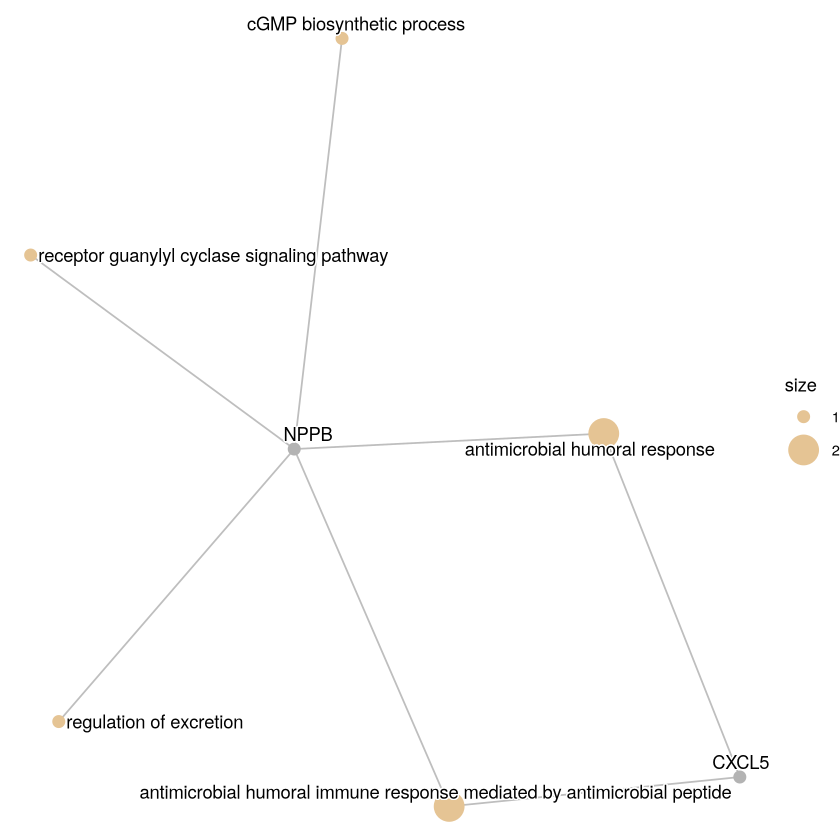

In [5]:
# create the enrichGO object (ego)
ego_MLB2 <- enrichGO(gene = gdiff_sgn_genes$MLB2, 
                OrgDb = org.Hs.eg.db,     # Replace with your organism database
                keyType = "ENSEMBL",      # Or another keyType like "SYMBOL"
                ont = "BP",               # Biological Process GO terms
                pAdjustMethod = "BH",     # Benjamini-Hochberg adjustment
                qvalueCutoff = 0.05,      # Adjust the p-value cutoff as needed
                readable = TRUE)

# Now, use cnetplot with the enrichGO result (ego)
cnetplot(ego_MLB2, categorySize = "pvalue")
#cnetplot(ego, categorySize = "pvalue", foldChange = gdiff_go)

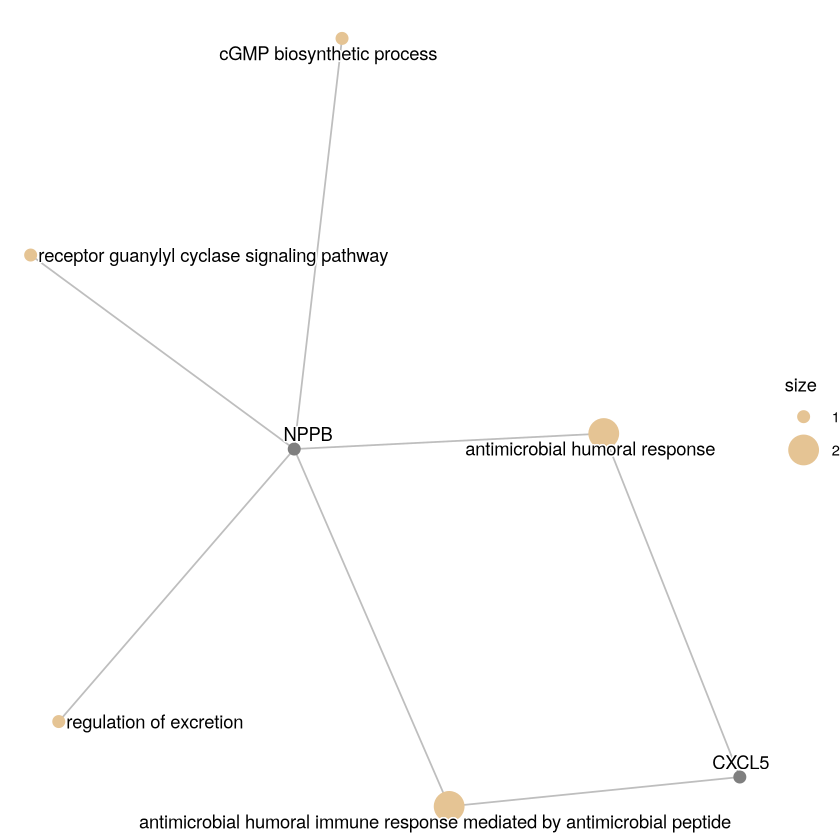

In [21]:
#log2FC_MLB2 <- deseq2_gut_diff_mockvirus$MLB2$log2FoldChange
#cnetplot(ego_MLB2, categorySize = "pvalue", foldChange = log2FC_MLB2)

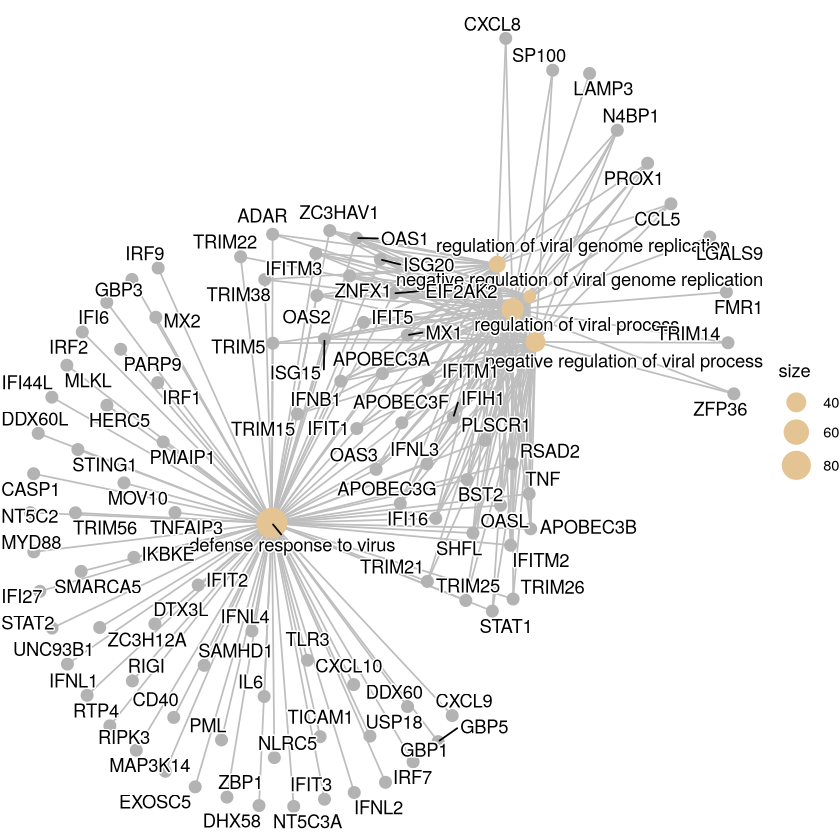

In [6]:
# create the enrichGO object (ego)
ego_VA1 <- enrichGO(gene = gdiff_sgn_genes$VA1, 
                OrgDb = org.Hs.eg.db,     # Replace with your organism database
                keyType = "ENSEMBL",      # Or another keyType like "SYMBOL"
                ont = "BP",               # Biological Process GO terms
                pAdjustMethod = "BH",     # Benjamini-Hochberg adjustment
                qvalueCutoff = 0.05,      # Adjust the p-value cutoff as needed
                readable = TRUE)

# Now, use cnetplot with the enrichGO result (ego)
cnetplot(ego_VA1, categorySize = "pvalue")


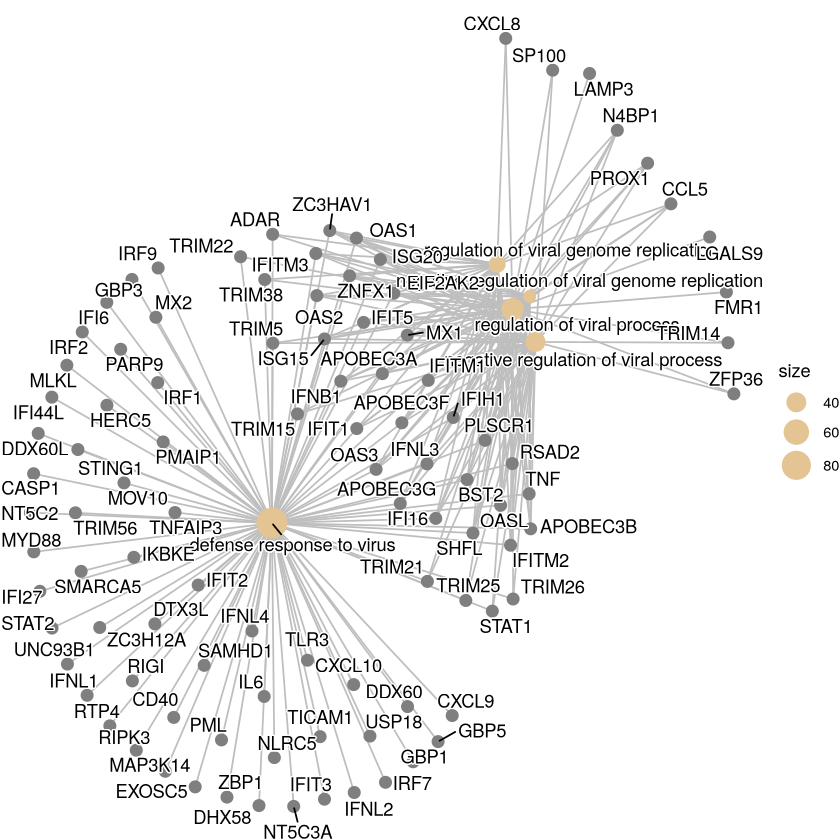

In [20]:
#deseq2_gut_diff_mockvirus = readRDS('../../rds/deseq2_gut_diff_mockvirus.rds')
#log2FC_VA1  <- deseq2_gut_diff_mockvirus$VA1$log2FoldChange
#cnetplot(ego_VA1, categorySize = "pvalue", foldChange = log2FC_VA1)


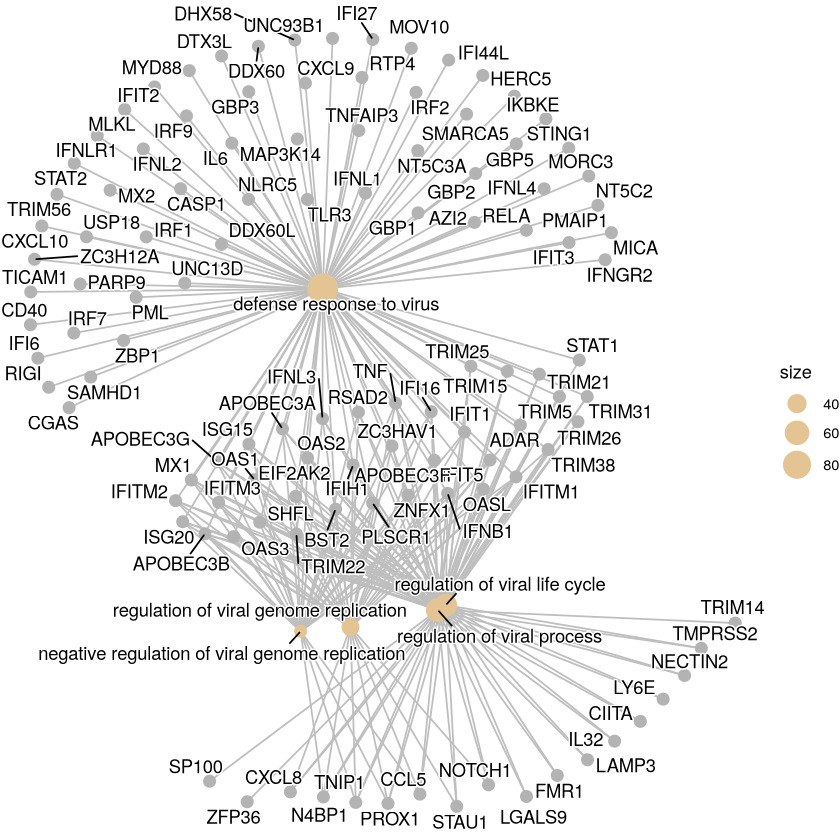

In [7]:
# create the enrichGO object (ego)
ego_HAstV4 <- enrichGO(gene = gdiff_sgn_genes$HAstV4, 
                OrgDb = org.Hs.eg.db,     # Replace with your organism database
                keyType = "ENSEMBL",      # Or another keyType like "SYMBOL"
                ont = "BP",               # Biological Process GO terms
                pAdjustMethod = "BH",     # Benjamini-Hochberg adjustment
                qvalueCutoff = 0.05,      # Adjust the p-value cutoff as needed
                readable = TRUE)

# Now, use cnetplot with the enrichGO result (ego)
cnetplot(ego_HAstV4, categorySize = "pvalue")

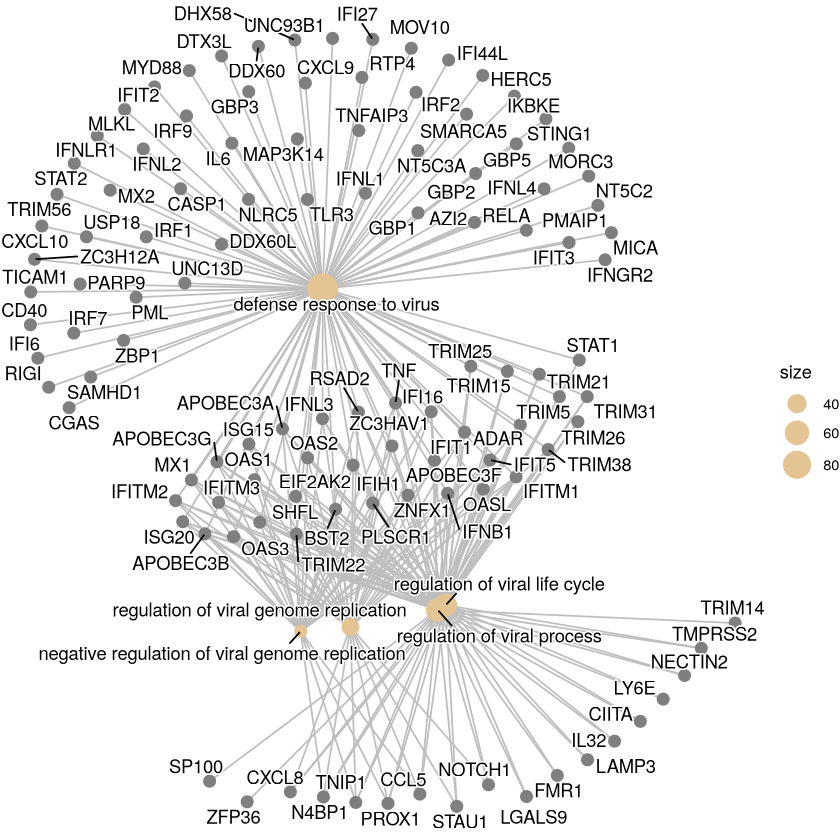

In [24]:
#log2FC_HAstV4 <- deseq2_gut_diff_mockvirus$HAstV4$log2FoldChange
#cnetplot(ego_HAstV4, categorySize = "pvalue", foldChange = log2FC_HAstV4)

Warning message:
“ggrepel: 55 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 81 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


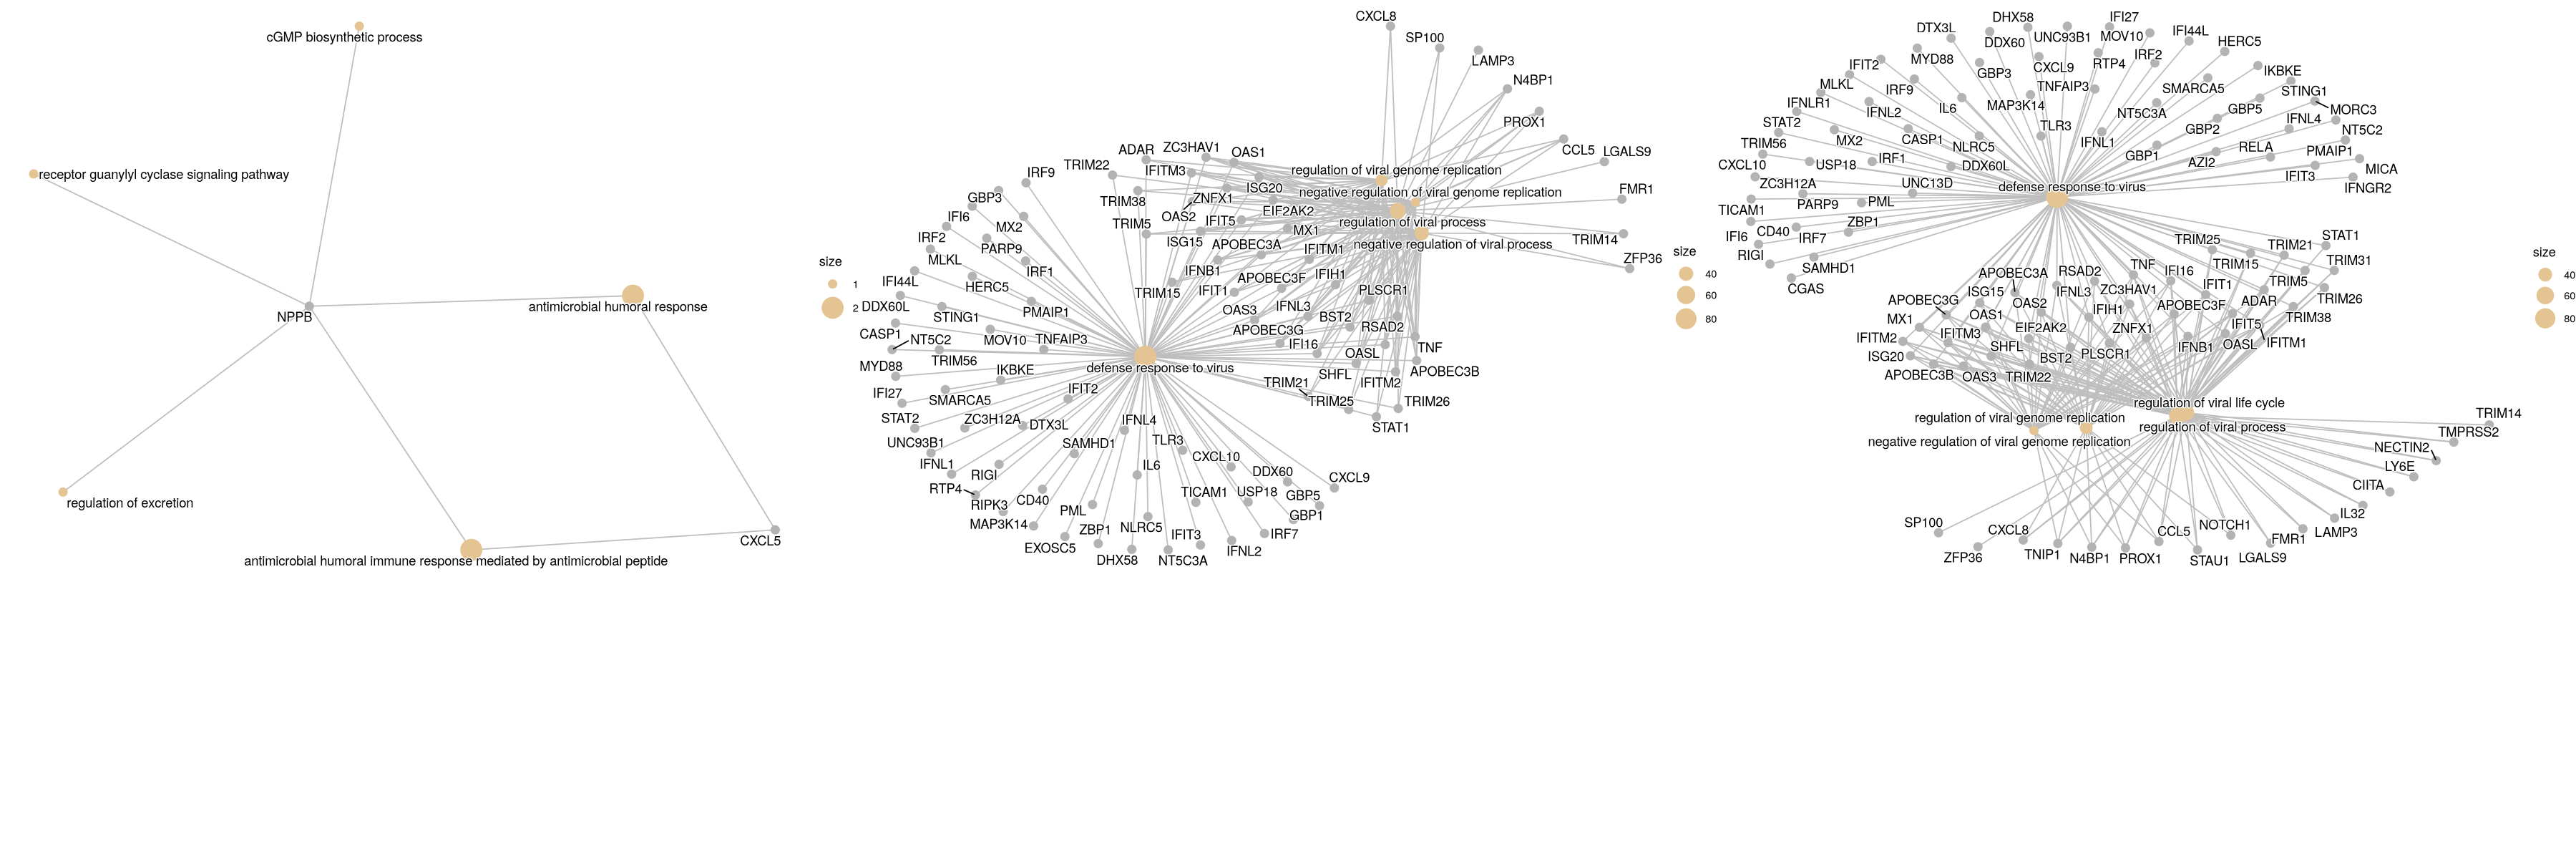

In [35]:
#library(gridExtra)
#library(grid)

# Increase 'max.overlaps' to a very high value to prevent overlaps
#plot_MLB2 <- cnetplot(ego_MLB2, categorySize = "pvalue")
#plot_VA1  <- cnetplot(ego_VA1, categorySize = "pvalue")
#plot_HAstV4 <- cnetplot(ego_HAstV4, categorySize = "pvalue")

# Create a title for the entire figure
#title <- textGrob("cnetplots: differentiated samples", gp = gpar(fontsize = 16, fontface = "bold"))

# Adjust layout spacing and size for better visualization
#grid.arrange(plot_MLB2, plot_VA1, plot_HAstV4, ncol = 3, heights = c(2, 1), widths = c(1, 1, 1))
#options(repr.plot.width = 30, repr.plot.height = 10)
# Optional: Save the arrangement to a PDF
# pdf("cnetplots_all_in_one.pdf", width = 18, height = 6)
# grid.arrange(title, plot_MLB2, plot_VA1, plot_HAstV4, ncol = 3, heights = c(0.1, 1), widths = c(1, 1, 1))
# dev.off()


Warning message:
“ggrepel: 34 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 54 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


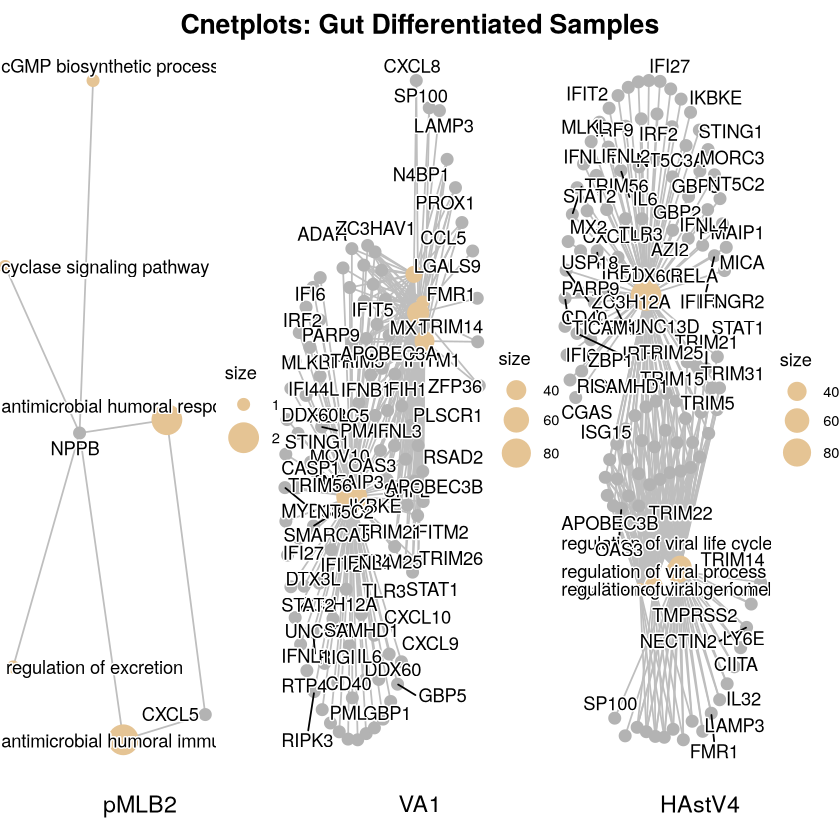

In [8]:
# Create the plots
plot_MLB2 <- cnetplot(ego_MLB2, categorySize = "pvalue")
plot_VA1  <- cnetplot(ego_VA1, categorySize = "pvalue")
plot_HAstV4 <- cnetplot(ego_HAstV4, categorySize = "pvalue")

# Create labels for each plot
label_MLB2 <- textGrob("pMLB2", gp = gpar(fontsize = 14))
label_VA1  <- textGrob("VA1", gp = gpar(fontsize = 14))
label_HAstV4 <- textGrob("HAstV4", gp = gpar(fontsize = 14))

# Arrange the plots and their labels
plots_grid <- arrangeGrob(
  plot_MLB2, plot_VA1, plot_HAstV4,
  label_MLB2, label_VA1, label_HAstV4,
  ncol = 3, nrow = 2, 
  heights = c(2, 0.2)  # First row: plots, second row: labels
)

# Create the title
title <- textGrob("Cnetplots: Gut Differentiated Samples", gp = gpar(fontsize = 16, fontface = "bold"))

# Arrange everything together
grid.arrange(title, plots_grid, ncol = 1, heights = c(0.3, 5))

# Adjust plot size
options(repr.plot.width = 30, repr.plot.height = 12)


In [11]:
pdf("cnetplots_differentiated_samples2.pdf", width = 25, height = 10)  # Adjust width & height
grid.draw(grid.arrange(title, plots_grid, ncol = 1, heights = c(0.3, 5)))
dev.off()

pdf 
  2

In [40]:
#deseq_gdiff = readRDS('../../rds/deseq2_gut_diff_mockvirus.rds')
#deseq_gundiff = readRDS('../../rds/deseq2_gut_undiff_mockvirus.rds')
#deseq_brain = readRDS('../../rds/deseq2_brain_mockvirus.rds')

In [10]:
ls()

[1] "b_go"              "b_sgn_genes"       "ego_HAstV4"       
 [4] "ego_MLB2"          "ego_VA1"           "gdiff_go"         
 [7] "gdiff_sgn_genes"   "gundiff_go"        "gundiff_sgn_genes"
[10] "label_HAstV4"      "label_MLB2"        "label_VA1"        
[13] "plot_HAstV4"       "plot_MLB2"         "plot_VA1"         
[16] "plots_grid"        "title"